This notebook tests for the correlation between the offense charged in a criminal complaint, the attorney representing the defendant, and the length of the defendant's sentence. It's based on data from [Bexar County](http://gov.bexar.org/dc/dcrecords.html), and it's intended to integrate with [Tubman Project](https://github.com/TubmanProject).

In [1]:
import pandas as pd
import os 
import datetime

pd.options.display.max_columns=150

In [2]:
files = os.listdir("../Bexar_crim")
files_xls = [f for f in files if f[-3:] == 'xls']
files_xls

['A-B.xls',
 'M.xls',
 'L.xls',
 'D-F.xls',
 'H-K.xls',
 'G.xls',
 'S.xls',
 'N-Q.xls',
 'C.xls',
 'T-V.xls']

In [3]:
df = pd.DataFrame()

In [4]:
for f in files_xls:
    data = pd.read_excel(f"../Bexar_crim/{f}")
    df = df.append(data)

In [5]:
# correcting error
df.loc[df["ORIGINAL-SENTENCE"] == 500] = '008YR00MTH00DYS000HR'
df.loc[df["ORIGINAL-SENTENCE"] == 100] = '003YR00MTH00DYS000HR'

In [30]:
sentences = df[df["ORIGINAL-SENTENCE"] != 'ORIGINAL-SENTENCE']

In [31]:
sentences[sentences["ORIGINAL-SENTENCE"] == 100]

,CASE-CAUSE-NBR,FULL-NAME,ALIAS,SEX,RACE,BIRTHDATE,SID,JUDICIAL-NBR,ADDR-HOUSE-NBR,HOUSE-SUF,ADDR-PRE-DIRECTION,ADDR-STREET,ADDR-STREET-SUFFIX,ADDR-POST-DIRECTION,ADDR-UNIT,ADDR-CITY,ADDR-STATE,ADDR-ZIP-CODE,ADDR-ZIP-PLUS-4,OFFENSE-DATE,OFFENSE-CODE,OFFENSE-DESC,OFFENSE-TYPE,REDUCED-OFFENSE-CODE,REDUCED-OFFENSE-DESC,REDUCED-OFFENSE-TYPE,LOCATION,CUSTODY-DATE,COMPLAINT-DATE,FILING-AGENCY-DESCRIPTION,CASE-DATE,CASE-DESC,SETTING-DATE,SETTING-TYPE,G-JURY-DATE,G-JURY-STATUS,DISPOSITION-DATE,DISPOSITION-CODE,DISPOSITION-DESC,JUDGEMENT-DATE,JUDGEMENT-CODE,JUDGEMENT-DESC,SENTENCE-DESC,SENTENCE,SENTENCE-START-DATE,SENTENCE-END-DATE,FINE-AMOUNT,COURT-COSTS,COURT-TYPE,COURT,POST-JUDICIAL-FIELD,POST-JUDICIAL-DATE,BOND-DATE,BOND-STATUS,BOND-AMOUNT,BONDSMAN-NAME,ATTORNEY,ATTORNEY-BAR-NBR,ATTORNEY-APPOINTED-RETAINED,INTAKE-PROSECUTOR,OUTTAKE-PROSECUTOR,PROBATION-PROSECUTOR,REVOKATION-PROSECUTOR,ORIGINAL-SENTENCE


In [32]:
sentences["ORIGINAL-SENTENCE"].unique()

array(['002YR00MTH00DYS000HR', '010YR00MOS00DYS000HR',
       '                    ', '005YR00MTH00DYS000HR',
       '003YR00MTH00DYS000HR', '004YR00MTH00DYS000HR',
       '001YR00MTH00DYS000HR', '005YR00MOS00DYS000HR',
       '010YR00MTH00DYS000HR', '007YR00MTH00DYS000HR',
       '025YR00MTH00DYS000HR', '015YR00MTH00DYS000HR',
       '018YR00MOS00DYS000HR', '008YR00MOS00DYS000HR',
       '020YR00MTH00DYS000HR', '002YR00MOS00DYS000HR',
       '006YR00MTH00DYS000HR', '000YR06MTH00DYS000HR',
       '002YR06MTH00DYS000HR', '007YR00MOS00DYS000HR',
       '035YR00MTH00DYS000HR', '000YR11MTH00DYS000HR',
       '028YR00MTH00DYS000HR', '000YR10MTH00DYS000HR',
       '008YR00MTH00DYS000HR', '013YR00MTH00DYS000HR',
       '025YR00MOS00DYS000HR', '000YR15MTH00DYS000HR',
       '000YR09MTH00DYS000HR', '000YR00MTH90DYS000HR',
       '003YR00MOS00DYS000HR', '000YR30MTH00DYS000HR',
       '018YR00MTH00DYS000HR', '000YR12MTH00DYS000HR',
       '006YR00MOS00DYS000HR', '012YR00MTH00DYS000HR',
       '00

In [33]:
'012YR06MTH00DYS000HR'.index('YR')

3

In [34]:
sentences[20:25]

,CASE-CAUSE-NBR,FULL-NAME,ALIAS,SEX,RACE,BIRTHDATE,SID,JUDICIAL-NBR,ADDR-HOUSE-NBR,HOUSE-SUF,ADDR-PRE-DIRECTION,ADDR-STREET,ADDR-STREET-SUFFIX,ADDR-POST-DIRECTION,ADDR-UNIT,ADDR-CITY,ADDR-STATE,ADDR-ZIP-CODE,ADDR-ZIP-PLUS-4,OFFENSE-DATE,OFFENSE-CODE,OFFENSE-DESC,OFFENSE-TYPE,REDUCED-OFFENSE-CODE,REDUCED-OFFENSE-DESC,REDUCED-OFFENSE-TYPE,LOCATION,CUSTODY-DATE,COMPLAINT-DATE,FILING-AGENCY-DESCRIPTION,CASE-DATE,CASE-DESC,SETTING-DATE,SETTING-TYPE,G-JURY-DATE,G-JURY-STATUS,DISPOSITION-DATE,DISPOSITION-CODE,DISPOSITION-DESC,JUDGEMENT-DATE,JUDGEMENT-CODE,JUDGEMENT-DESC,SENTENCE-DESC,SENTENCE,SENTENCE-START-DATE,SENTENCE-END-DATE,FINE-AMOUNT,COURT-COSTS,COURT-TYPE,COURT,POST-JUDICIAL-FIELD,POST-JUDICIAL-DATE,BOND-DATE,BOND-STATUS,BOND-AMOUNT,BONDSMAN-NAME,ATTORNEY,ATTORNEY-BAR-NBR,ATTORNEY-APPOINTED-RETAINED,INTAKE-PROSECUTOR,OUTTAKE-PROSECUTOR,PROBATION-PROSECUTOR,REVOKATION-PROSECUTOR,ORIGINAL-SENTENCE
20,2011CR4905A,"AAROYO, GUADALUPE",X,M,L,1984-08-15 00:00:00,779807,1465106,4331,,W,CESAR E CHAVEZ,BLVD,,,SAN ANTONIO,TX,78237,2141,2011-04-04 00:00:00,120103,AGGRAVATED ROBBERY,F1,0,,,TDC,2013-03-27 00:00:00,20110404,BEXAR COUNTY DISTRICT ATTORNEY,2013-03-27 00:00:00,SENTENCED,2012-09-24 00:00:00,T,2011-06-16 00:00:00,IND,2013-03-27 00:00:00,641,NOLO CT-GUILTY,2013-03-27 00:00:00,703,SENTENCE-FINE+TERM,SENTENCE - FINE & TERM,70000000,2013-03-27 00:00:00,,1500,314,DC,D290,SENTENCE-FINE+TERM,2013-03-27 00:00:00,2013-03-27 00:00:00,RWB,1e+07,"POOLE,THOMAS E","BOYD, STEPHANIE R",90001456,A,"FOX, RICHARD H","LEVY, JONATHAN","MOLINA, RICHARD T",,007YR00MTH00DYS000HR
21,1991CR0611,"ABAD, CARLOS EDWARD",,M,L,1956-07-30 00:00:00,25442,481389,2313,,,BIG LAKE,,,,SAN ANTONIO,TX,78238,0,1990-12-12 00:00:00,220301,BURG W-INT THEFT-FORCE-NORES,F2,0,,,TDC,1990-12-12 00:00:00,19901212,,1991-02-22 00:00:00,SENTENCED,1991-02-22 00:00:00,T,1991-02-13 00:00:00,IND,1991-02-22 00:00:00,631,PG CT-GUILTY,1991-02-22 00:00:00,701,SENTENCE-TERM,SENTENCE - TERM,250000000,1991-02-22 00:00:00,,1000,384.5,DC,D290,SENTENCE-FINE+TERM,1991-02-22 00:00:00,1991-02-13 00:00:00,SET,40000,,"BERCHELMANN, WILLIAM G",2182700,A,"PRIEST, MELISSA L","KOPP, JAMES O",,,025YR00MTH00DYS000HR
22,1997CR5035,"ABAD, CARLOS EDWARD",,M,L,1956-07-30 00:00:00,25442,744342,2313,,,BIG LAKE,,,,SAN ANTONIO,TX,78238,0,1996-08-27 00:00:00,359902,MAN/DEL CS PG 1 1 GRAM TO 4 G,F2,0,,,TDC,1997-10-22 00:00:00,19970423,BEXAR COUNTY DISTRICT ATTORNEY,1998-01-07 00:00:00,SENTENCED,,,1997-10-21 00:00:00,IND,1998-01-07 00:00:00,631,PG CT-GUILTY,1998-01-07 00:00:00,703,SENTENCE-FINE+TERM,SENTENCE - FINE & TERM,150000000,1998-01-07 00:00:00,,1000,481.5,DC,D226,SENTENCE-FINE+TERM,1998-01-07 00:00:00,1998-01-07 00:00:00,RWB,1e+07,,"VALADEZ, HILDA QUESADA",20421843,A,"CHRISTIAN, M LISS","WHEAT, JAMES SUMNER",,,015YR00MTH00DYS000HR
23,1982CR2102,"ABAD, CARLOS EDWARD",,M,L,1956-07-30 00:00:00,25442,111714,2313,,,BIG LAKE,,,,SAN ANTONIO,TX,78238,0,1982-07-14 00:00:00,230003,THEFT-$20-200,MA,0,,,DIR,,19801016,,1982-07-14 00:00:00,SENTENCED,,,1982-06-30 00:00:00,RID,1982-07-14 00:00:00,631,PG CT-GUILTY,1982-07-14 00:00:00,717,JUDG-FINE ASSESSED,,0,,,2000,445.5,DC,D289,SENTENCE-FINE,1982-07-14 00:00:00,1982-06-30 00:00:00,SET,40000,"NICHOLAS, ANTHONY","NICHOLAS, ANTHONY",14991000,A,"SCHILL, CHARLES MICHAEL",,,,
24,1984CR3194,"ABAD, CARLOS EDWARD",,M,L,1956-07-30 00:00:00,25442,229347,2313,,,BIG LAKE,,,,SAN ANTONIO,TX,78238,0,1984-09-07 00:00:00,230063,THEFT-$750-20000,F3,230063,THEFT-$750-20000,F3,TDC,1984-10-30 00:00:00,19841015,,1984-12-06 00:00:00,WAIVED RT TO APPL,,,1984-10-31 00:00:00,IND,1984-12-06 00:00:00,631,PG CT-GUILTY,1984-12-06 00:00:00,701,SENTENCE-TERM,SENTENCE - TERM,180000000,1984-10-30 00:00:00,,0,0,DC,D144,SENTENCE-TERM,1984-12-06 00:00:00,1984-12-06 00:00:00,RWB,1e+07,,"CAMARA, EDWARD",3674570,A,,"REAVES, ROBERT J",,,018YR00MOS00DYS000HR


In [35]:
sentences["SENTENCE-DESC"].unique()

array(['                       ', 'PROBATION - TERM       ',
       'SENTENCE - TERM        ', 'PROBATION - TERM & FINE',
       'SENTENCE - FINE & TERM ', 'SENTENCE - LIFE        ',
       'SENTENCE - FINE        ', 'SENTENCE - DEATH       ',
       '008YR00MTH00DYS000HR', '003YR00MTH00DYS000HR'], dtype=object)

In [37]:
sentences["JUDGEMENT-DESC"].unique()

array(['NC-DEFR ADJUD TERM', 'PROBATION TERM    ', '                  ',
       'SENTENCE-TERM     ', 'PROB-TERM + FINE  ', 'PG-DEFR ADJUD TERM',
       'SENTENCE-FINE+TERM', 'JUDG-FINE ASSESSED', 'PUNISHMENT DEFERRE',
       'PLUS A $350 FINE  ', "COND'L DISCH TERM ", 'JUDGEMENT ASSESSED',
       'JDGMT ASSESSD LIFE', 'JURY/PUNISHMENT   ', 'SENTENCE-LIFE     ',
       'JUDGMENT DEFERRED ', 'PLUS A $500 FINE  ', 'JUDGMENT          ',
       'JUDGEMENT DEFERRED', 'JUDGEMENT AMENDED ', 'COURT REDUCED (3) ',
       'PLUS $700. FINE   ', 'FINE AMOUNT       ', 'COURT/PUNISHMENT  ',
       'MT SUPPRESS AND ID', 'LICENSE SUSPENDED ', 'PUNISHMENT        ',
       'JUDGMENT ASSESED  ', 'JDGMT ASSESD DEATH', 'JUDGMENT AND PUNIS',
       'COURT REPORTER    ', 'JUDGMENT ASSESSED ', 'FINE ASSESSED     ',
       'AFFIRMATIVE FINDIN', 'SENTENCE-FINE     ', 'FINE ASSESSED $500',
       'PLUS A $200 FINE  ', 'PLUS A $300 FINE  ', 'SENTENCE-DEATH    ',
       'JUDGMENT AND      ', 'PLUS A $250 FINE  ', 

In [38]:
def sentence_length(sent):
    if sent.strip() == "":
        return sent
    year_i = sent.index('YR')
    month_i = sent.index('M')
    day_i = sent.index('DY')
    
    years = sent[year_i - 2: year_i]
    months = sent[month_i - 2: month_i]
    days = sent[day_i - 2: day_i]
    return datetime.timedelta(days=int(years) * 365 + int(months) * 30 + int(days))

# sentence_length('008YR00MTH00DYS000HR')
sentences["ORIGINAL-SENTENCE"] = sentences["ORIGINAL-SENTENCE"].apply(sentence_length)

/Users/Matt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
# Arbitrarily valuing a life sentence at 100 years and a death sentence at 200 years.

def life_or_death(row):
    if row["SENTENCE-DESC"] == 'SENTENCE - LIFE        ' or "LIFE" in row["JUDGEMENT-DESC"]:
        return datetime.timedelta(days=100 * 365)
    elif row["SENTENCE-DESC"] == 'SENTENCE - DEATH       ' or "DEATH" in row["JUDGEMENT-DESC"]:
        return datetime.timedelta(days=200 * 365)
    else: 
        return row["ORIGINAL-SENTENCE"]

sentences["ORIGINAL-SENTENCE"] = sentences.apply(life_or_death, axis=1)

/Users/Matt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [40]:
sentences['new'] = sentences["ORIGINAL-SENTENCE"].values.astype(int)
means = sentences.groupby("OFFENSE-CODE").mean()
means['AVERAGE-SENTENCE-FOR-CODE'] = pd.to_timedelta(means['new'])

/Users/Matt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
sentences = sentences.drop(labels='new', axis=1)
means = means.drop(labels='new', axis=1)

In [42]:
len(means)

1586

In [44]:
means = means.reset_index()

In [45]:
means[:5]

,OFFENSE-CODE,AVERAGE-SENTENCE-FOR-CODE
0,21,730 days 00:00:00
1,100,1825 days 00:00:00
2,400,6 days 00:00:00
3,500,3741 days 06:00:00
4,999,712 days 14:51:25.714285


In [46]:
sentences_with_average = pd.merge(sentences, means, how='left', on="OFFENSE-CODE")

In [28]:
sentences_with_average["AVERAGE-SENTENCE-FOR-CODE"].dtype

dtype('<m8[ns]')

In [70]:
sentences_with_average["DIFFERENCE-FROM-AVERAGE"] = \
    sentences_with_average["ORIGINAL-SENTENCE"] - sentences_with_average["AVERAGE-SENTENCE-FOR-CODE"]

In [72]:
# modify this to get DIFFERENCE-FROM-AVERAGE by race and gender

sentences_with_average['new'] = sentences_with_average["DIFFERENCE-FROM-AVERAGE"].values.astype(int)
means = sentences_with_average.groupby(["RACE"]).mean()
means['DIFFERENCE-FROM-AVERAGE-BY-RACE'] = pd.to_timedelta(means['new'])
means = means.drop(labels='new', axis=1)

This indicates that the average sentence for White defendants was 87 days less than the average sentence for the same offense, but for Black defendants it was 25 more than average and for Latino defendants it was 39 days more than average.

I haven't found a data dictionary to explain the other codes.

In [86]:
race_means = means.reset_index()

In [98]:
race_means = race_means.loc[~race_means['RACE'].isin([' ', '003YR00MTH00DYS000HR',
                                                     '008YR00MTH00DYS000HR'])]

In [109]:
race_graph = race_means.set_index("RACE")

In [110]:
def days(td):
    return td.days

race_graph["DIFFERENCE-FROM-AVERAGE-BY-RACE"] = \
    race_graph["DIFFERENCE-FROM-AVERAGE-BY-RACE"].apply(days)

In [111]:
# need to convert the timedelta to a # of days

race_graph

,DIFFERENCE-FROM-AVERAGE-BY-RACE
RACE,
A,-154
B,25
C,-432
H,351
I,-405
J,-347
L,39
O,-137
U,-167


In [78]:
% matplotlib inline

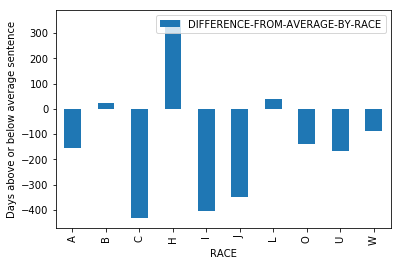

In [115]:
import matplotlib.pyplot as plt

plt.figure()
ax = race_graph.plot(kind='bar')
ax.set_ylabel("Days above or below average sentence")

Similar to above, but for sex.

In [76]:
means_sex = sentences_with_average.groupby(["SEX"]).mean()
means_sex['DIFFERENCE-FROM-AVERAGE-BY-SEX'] = pd.to_timedelta(means_sex['new'])
means_sex

,new,DIFFERENCE-FROM-AVERAGE-BY-SEX
SEX,,
,-4.692922e+16,-544 days +20:06:21.036361
003YR00MTH00DYS000HR,0.000000e+00,0 days 00:00:00
008YR00MTH00DYS000HR,0.000000e+00,0 days 00:00:00
F,-1.289511e+16,-150 days +18:01:27.142492
M,2.833041e+15,32 days 18:57:20.603377
U,-6.308724e+16,-731 days +19:45:59.857854


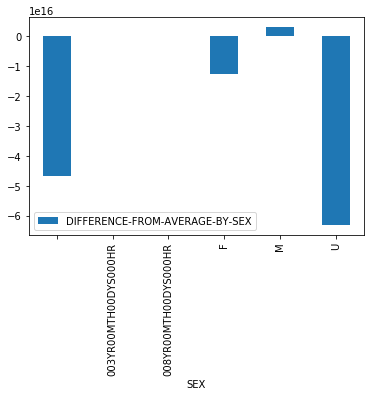

In [106]:
means_sex = means_sex.drop(labels='new', axis=1)
means_sex.plot(kind='bar')